# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
csv_file=pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
csv_file.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [165]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_lst=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_lst.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)
# pprint(lat_lng_lst)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [166]:
#create a DataFrame 
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"Cities"})
cities_df.head()

,Cities
0,ushuaia
1,nuuk
2,megion
3,guerrero negro
4,albany


In [167]:
cities_df["lat_lng_lst"]=lat_lng_lst
cities_df["Latitude"]=cities_df["lat_lng_lst"].map(lambda x: str(x[0]))
cities_df["Longtitude"]=cities_df["lat_lng_lst"].map(lambda x: str(x[1]))
del cities_df['lat_lng_lst']
cities_df

,Cities,Latitude,Longtitude
0,ushuaia,-70.45591840689411,-58.60719186604143
1,nuuk,59.49954460376628,-56.91086760802679
2,megion,59.26225007025951,75.53371226605884
3,guerrero negro,22.25991150945086,-120.14586743793245
4,albany,-44.03336842656935,113.91587349899481
...,...,...,...
601,grado,43.367657907027535,-6.05276182535377
602,nioro,14.565420327276414,-8.962581366690102
603,tromso,73.39774196261692,19.10732441578594
604,bereda,13.890086983888736,51.301448274364475


In [171]:
#Create new columns for data we'll be collecting from the API
max_temp=[]
humidity=[]
cloud=[]
wind_speed=[]
country=[]
date=[]

url = "http://api.openweathermap.org/data/2.5/weather?"
city=cities_df["Cities"]

units="metric"
#Build Partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + weather_api_key
print("Beginning Data Retrieval")
print("-------------------------")
counter=1
for city in cities:

    response=requests.get(query_url+city).json()
    try:
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
       
        print(f"Processing Record {counter} | {response['name']}")
        print(query_url+city)
        counter=counter+1
#         print("The data is found!")
    except:
        max_temp.append(None)
        humidity.append(None)
        cloud.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)
        print("The data couldn't be found!")
    next

Beginning Data Retrieval
-------------------------
Processing Record 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=ushuaia
Processing Record 2 | Nuuk
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=nuuk
Processing Record 3 | Megion
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=megion
Processing Record 4 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=guerrero negro
Processing Record 5 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=albany
Processing Record 6 | Atuona
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=atuona
Processing Record 7 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be

Processing Record 61 | Ruidoso
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=ruidoso
Processing Record 62 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=hermanus
Processing Record 63 | Dutse
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=dutse
Processing Record 64 | Muta
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=muta
Processing Record 65 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=busselton
The data couldn't be found!
Processing Record 66 | Sørland
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=sorland
Processing Record 67 | Hobyo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=hobyo


The data couldn't be found!
The data couldn't be found!
Processing Record 117 | Imbituba
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=imbituba
Processing Record 118 | São Félix do Xingu
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=sao felix do xingu
Processing Record 119 | Udachny
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=udachnyy
Processing Record 120 | Portland
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=portland
Processing Record 121 | Kosh-Agach
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=kosh-agach
Processing Record 122 | Lodja
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=lodja
Processing Record 123 | Ust'-Koksa
http://api.openweathermap.org/data

Processing Record 176 | Gainesville
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=gainesville
Processing Record 177 | Igarka
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=igarka
Processing Record 178 | Vanavara
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=vanavara
Processing Record 179 | North Bend
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=north bend
The data couldn't be found!
Processing Record 180 | Sabha
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=sabha
Processing Record 181 | Sédhiou
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=sedhiou
Processing Record 182 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa

Processing Record 236 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=mitsamiouli
Processing Record 237 | São Filipe
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=sao filipe
Processing Record 238 | Harvard
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=harvard
Processing Record 239 | Alaşehir
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=alasehir
Processing Record 240 | Raton
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=raton
Processing Record 241 | Nakamura
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=nakamura
Processing Record 242 | Inongo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=inongo
P

Processing Record 295 | Isabela
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=isabela
Processing Record 296 | Salekhard
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=salekhard
Processing Record 297 | Geraldton
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=geraldton
Processing Record 298 | Kibuye
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=kibuye
Processing Record 299 | Severo-Kuril'sk
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=severo-kurilsk
Processing Record 300 | Traralgon
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=traralgon
Processing Record 301 | Fernley
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metri

Processing Record 353 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=half moon bay
Processing Record 354 | Staryy Nadym
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=staryy nadym
Processing Record 355 | Guarapari
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=guarapari
Processing Record 356 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=olafsvik
Processing Record 357 | Broome
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=broome
Processing Record 358 | Beroroha
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=beroroha
Processing Record 359 | Dingle
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=met

Processing Record 411 | Tura
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=tura
Processing Record 412 | Nara
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=nara
Processing Record 413 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=nouadhibou
Processing Record 414 | Caucasia
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=caucasia
Processing Record 415 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=san policarpo
Processing Record 416 | Paraná
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=parana
Processing Record 417 | Yayva
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=yayva
Processing 

Processing Record 469 | Carbonia
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=carbonia
Processing Record 470 | Dovolnoye
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=dovolnoye
Processing Record 471 | Vidim
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=vidim
Processing Record 472 | Mâncio Lima
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=mancio lima
Processing Record 473 | Boyolangu
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=boyolangu
Processing Record 474 | Maumere
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=maumere
Processing Record 475 | Sokoni
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=sokoni
T

Processing Record 527 | Derzhavīnsk
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=derzhavinsk
Processing Record 528 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=haines junction
Processing Record 529 | Midland
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=midland
Processing Record 530 | Isla Mujeres
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=isla mujeres
Processing Record 531 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=okhotsk
Processing Record 532 | Mutoko
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=metric&q=mutoko
Processing Record 533 | Miranda
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&unit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [172]:
cities_df['Max_Temp']=max_temp
cities_df['Humidity']=humidity
cities_df['Cloudiness']=cloud
cities_df['WindSpeed']=wind_speed
cities_df['Country']=country
cities_df['Date']=date

cities_df

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ushuaia,-70.45591840689411,-58.60719186604143,-3.00,92.0,75.0,0.16,AR,1.595047e+09
1,nuuk,59.49954460376628,-56.91086760802679,12.00,62.0,93.0,1.00,GL,1.595047e+09
2,megion,59.26225007025951,75.53371226605884,21.00,60.0,1.0,4.00,RU,1.595047e+09
3,guerrero negro,22.25991150945086,-120.14586743793245,20.71,78.0,0.0,5.52,MX,1.595047e+09
4,albany,-44.03336842656935,113.91587349899481,21.67,99.0,0.0,1.95,US,1.595047e+09
...,...,...,...,...,...,...,...,...,...
601,grado,43.367657907027535,-6.05276182535377,16.00,87.0,38.0,2.10,ES,1.595047e+09
602,nioro,14.565420327276414,-8.962581366690102,23.91,91.0,81.0,2.39,GM,1.595047e+09
603,tromso,73.39774196261692,19.10732441578594,13.00,82.0,90.0,6.20,NO,1.595047e+09
604,bereda,13.890086983888736,51.301448274364475,14.44,100.0,40.0,0.45,ES,1.595047e+09


In [173]:
cities_df.count()

Cities        606
Latitude      606
Longtitude    606
Max_Temp      558
Humidity      558
Cloudiness    558
WindSpeed     558
Country       558
Date          558
dtype: int64

In [174]:
cities_df=cities_df.dropna(how='any')
cities_df

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ushuaia,-70.45591840689411,-58.60719186604143,-3.00,92.0,75.0,0.16,AR,1.595047e+09
1,nuuk,59.49954460376628,-56.91086760802679,12.00,62.0,93.0,1.00,GL,1.595047e+09
2,megion,59.26225007025951,75.53371226605884,21.00,60.0,1.0,4.00,RU,1.595047e+09
3,guerrero negro,22.25991150945086,-120.14586743793245,20.71,78.0,0.0,5.52,MX,1.595047e+09
4,albany,-44.03336842656935,113.91587349899481,21.67,99.0,0.0,1.95,US,1.595047e+09
...,...,...,...,...,...,...,...,...,...
601,grado,43.367657907027535,-6.05276182535377,16.00,87.0,38.0,2.10,ES,1.595047e+09
602,nioro,14.565420327276414,-8.962581366690102,23.91,91.0,81.0,2.39,GM,1.595047e+09
603,tromso,73.39774196261692,19.10732441578594,13.00,82.0,90.0,6.20,NO,1.595047e+09
604,bereda,13.890086983888736,51.301448274364475,14.44,100.0,40.0,0.45,ES,1.595047e+09


In [175]:
cities_df.count()

Cities        558
Latitude      558
Longtitude    558
Max_Temp      558
Humidity      558
Cloudiness    558
WindSpeed     558
Country       558
Date          558
dtype: int64

In [176]:
cities_df.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,ushuaia,-70.45591840689411,-58.60719186604143,-3.00,92.0,75.0,0.16,AR,1.595047e+09
1,nuuk,59.49954460376628,-56.91086760802679,12.00,62.0,93.0,1.00,GL,1.595047e+09
2,megion,59.26225007025951,75.53371226605884,21.00,60.0,1.0,4.00,RU,1.595047e+09
3,guerrero negro,22.25991150945086,-120.14586743793245,20.71,78.0,0.0,5.52,MX,1.595047e+09
4,albany,-44.03336842656935,113.91587349899481,21.67,99.0,0.0,1.95,US,1.595047e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [177]:
humidity_cities=cities_df.loc[cities_df['Humidity']>100]
humidity_cities 

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date


In [178]:
cities_df['Latitude'] = cities_df['Latitude'].astype(float)
cities_df['Longtitude']=cities_df['Longtitude'].astype(float)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
del cities_df['Country']
cities_df

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
0,ushuaia,-70.455918,-58.607192,-3.00,92.0,75.0,0.16,1.595047e+09
1,nuuk,59.499545,-56.910868,12.00,62.0,93.0,1.00,1.595047e+09
2,megion,59.262250,75.533712,21.00,60.0,1.0,4.00,1.595047e+09
3,guerrero negro,22.259912,-120.145867,20.71,78.0,0.0,5.52,1.595047e+09
4,albany,-44.033368,113.915873,21.67,99.0,0.0,1.95,1.595047e+09
...,...,...,...,...,...,...,...,...
601,grado,43.367658,-6.052762,16.00,87.0,38.0,2.10,1.595047e+09
602,nioro,14.565420,-8.962581,23.91,91.0,81.0,2.39,1.595047e+09
603,tromso,73.397742,19.107324,13.00,82.0,90.0,6.20,1.595047e+09
604,bereda,13.890087,51.301448,14.44,100.0,40.0,0.45,1.595047e+09


In [180]:
cities_df.describe()

,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,18.497778,16.962346,20.508781,70.831541,49.598566,3.354695,1.595047e+09
std,36.420226,90.573688,7.602288,20.554877,37.903404,2.345898,6.024365e+01
min,-87.175971,-176.563137,-3.000000,3.000000,0.000000,0.090000,1.595047e+09
25%,-7.434985,-58.973388,15.107500,59.000000,7.000000,1.500000,1.595047e+09
50%,22.197339,19.697491,21.000000,76.000000,52.000000,2.855000,1.595047e+09
75%,47.628744,92.504878,26.577500,87.000000,89.750000,4.600000,1.595047e+09
max,89.616078,179.260678,42.220000,100.000000,100.000000,16.820000,1.595047e+09


In [181]:
#  Get the indices of cities that have humidity over 100%.
cities_df[cities_df['Humidity']>100].index


Int64Index([], dtype='int64')

In [183]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clear_city_data=cities_df.drop(cities_df[cities_df['Humidity']>100].index)
# cities_df.drop(cities_df[cities_df['Humidity']>100].index, inplace=True)
clear_city_data.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
0,ushuaia,-70.455918,-58.607192,-3.00,92.0,75.0,0.16,1.595047e+09
1,nuuk,59.499545,-56.910868,12.00,62.0,93.0,1.00,1.595047e+09
2,megion,59.262250,75.533712,21.00,60.0,1.0,4.00,1.595047e+09
3,guerrero negro,22.259912,-120.145867,20.71,78.0,0.0,5.52,1.595047e+09
4,albany,-44.033368,113.915873,21.67,99.0,0.0,1.95,1.595047e+09


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [184]:
# Extract relevant fields from the data frame

clear_city_data.to_csv(output_data_file)
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

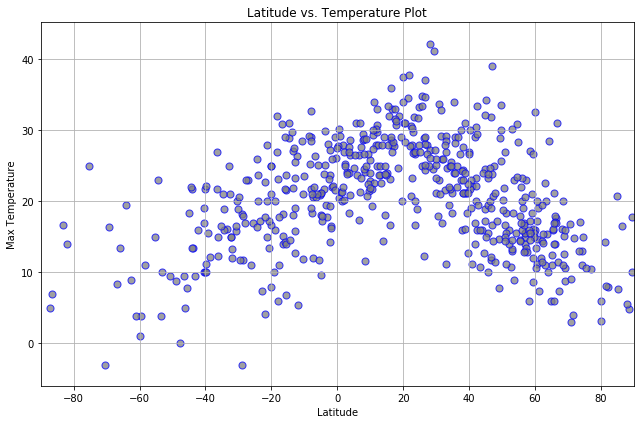

In [185]:
#Build a Scatter plot for each data type
plt.figure(figsize=(9,6))
plt.scatter(clear_city_data["Latitude"],clear_city_data['Max_Temp'], marker='o',facecolors="grey",edgecolors="blue", s=50, alpha=0.75)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.grid(True)

#save the figure
# plt.savefig("LatitudevsTemperature_scatter_plot.png")
#Modify ticks
plt.xlim(-90, 90)
plt.ylim(min(clear_city_data['Max_Temp'])-3, max(clear_city_data['Max_Temp'])+3)

plt.tight_layout()
plt.show()

            

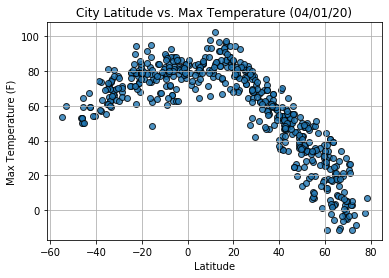

## Latitude vs. Humidity Plot

In [186]:
clear_city_data.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
0,ushuaia,-70.455918,-58.607192,-3.00,92.0,75.0,0.16,1.595047e+09
1,nuuk,59.499545,-56.910868,12.00,62.0,93.0,1.00,1.595047e+09
2,megion,59.262250,75.533712,21.00,60.0,1.0,4.00,1.595047e+09
3,guerrero negro,22.259912,-120.145867,20.71,78.0,0.0,5.52,1.595047e+09
4,albany,-44.033368,113.915873,21.67,99.0,0.0,1.95,1.595047e+09


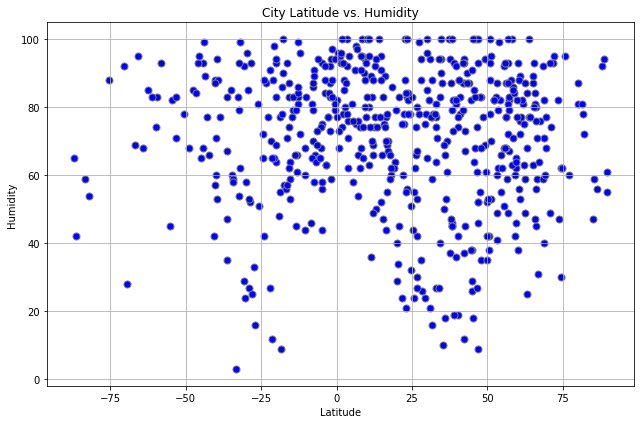

In [187]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['Humidity']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="grey", s=50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

plt.tight_layout()
plt.show()



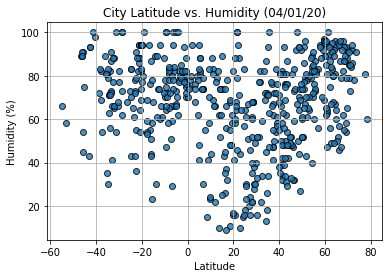

## Latitude vs. Cloudiness Plot

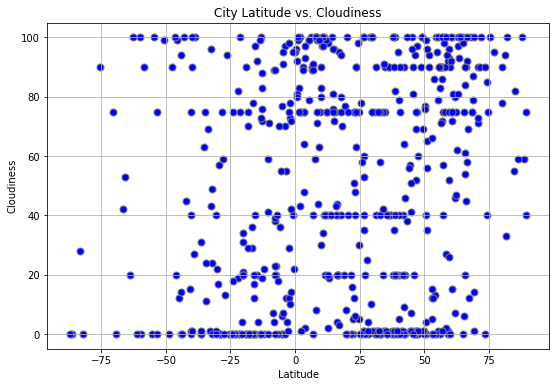

In [188]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['Cloudiness']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="grey", s=50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness")

plt.grid(True)

plt.show()

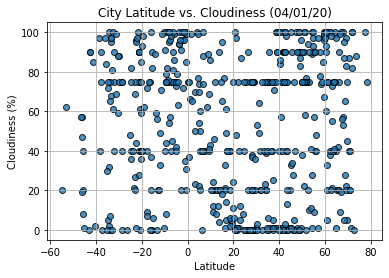

## Latitude vs. Wind Speed Plot

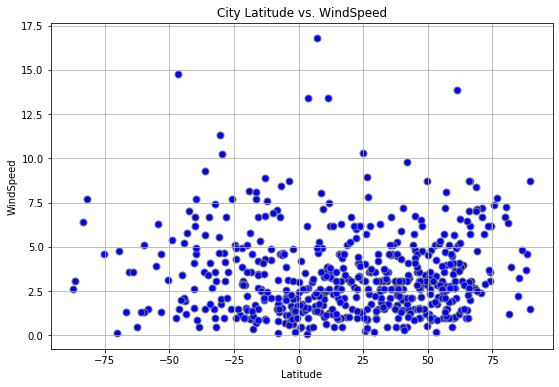

In [189]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['WindSpeed']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="grey", s=50)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.title(f"City Latitude vs. WindSpeed")

plt.grid(True)

plt.show()

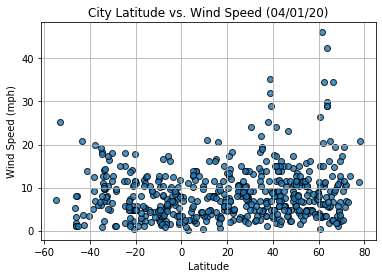

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [190]:
Nothern_hemisphere=clear_city_data.loc[clear_city_data['Latitude']>=0]
Nothern_hemisphere

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
1,nuuk,59.499545,-56.910868,12.00,62.0,93.0,1.00,1.595047e+09
2,megion,59.262250,75.533712,21.00,60.0,1.0,4.00,1.595047e+09
3,guerrero negro,22.259912,-120.145867,20.71,78.0,0.0,5.52,1.595047e+09
8,findlay,40.873809,-83.686222,22.22,78.0,1.0,2.10,1.595047e+09
10,san andres,11.646080,-81.628960,28.00,83.0,20.0,3.60,1.595047e+09
...,...,...,...,...,...,...,...,...
601,grado,43.367658,-6.052762,16.00,87.0,38.0,2.10,1.595047e+09
602,nioro,14.565420,-8.962581,23.91,91.0,81.0,2.39,1.595047e+09
603,tromso,73.397742,19.107324,13.00,82.0,90.0,6.20,1.595047e+09
604,bereda,13.890087,51.301448,14.44,100.0,40.0,0.45,1.595047e+09


The r-squared is : 0.3857948859193301 


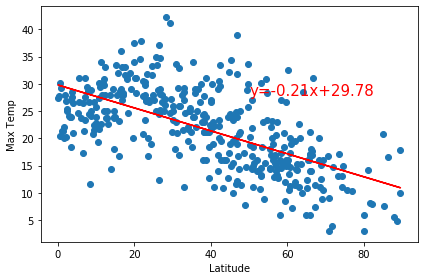

In [191]:
y_values=Nothern_hemisphere["Max_Temp"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,28),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

The r-squared is: 0.8271188905041935


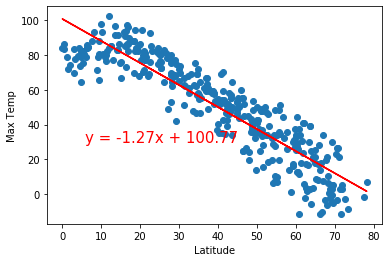

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [192]:
Sothern_hemispehere=clear_city_data.loc[clear_city_data['Latitude']<0]
Sothern_hemispehere

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
0,ushuaia,-70.455918,-58.607192,-3.00,92.0,75.0,0.16,1.595047e+09
4,albany,-44.033368,113.915873,21.67,99.0,0.0,1.95,1.595047e+09
5,atuona,-12.182069,-144.807689,26.41,72.0,22.0,7.57,1.595047e+09
6,port alfred,-69.425695,43.642178,16.41,28.0,0.0,4.74,1.595047e+09
7,mar del plata,-58.328677,-44.054833,11.00,93.0,90.0,1.50,1.595047e+09
...,...,...,...,...,...,...,...,...
579,mutoko,-17.884936,32.548828,5.89,90.0,0.0,1.35,1.595047e+09
580,miranda,-19.964896,-56.772445,21.00,83.0,20.0,3.60,1.595047e+09
588,vila velha,-24.070985,-28.721844,20.00,88.0,75.0,1.00,1.595047e+09
594,ulladulla,-40.509300,157.579814,17.00,42.0,15.0,2.60,1.595047e+09


The r-squared is : 0.2510950526198161 


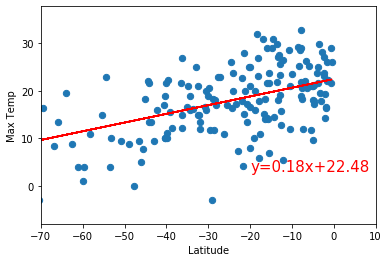

In [193]:
y_values=Sothern_hemispehere["Max_Temp"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(-70,10)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-20,3),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()


The r-squared is: 0.39936284758885965


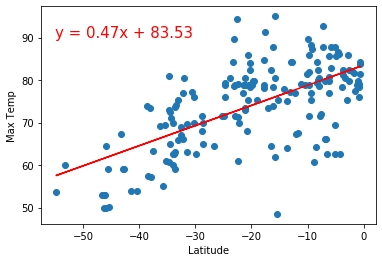

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01012144770500699 


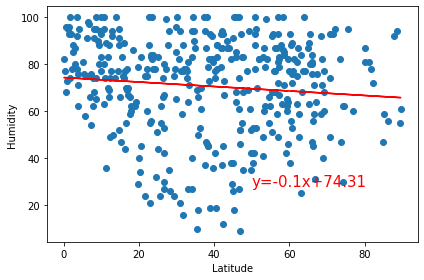

In [195]:
y_values=Nothern_hemisphere["Humidity"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,28),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

The r-squared is: 0.10829462153873139


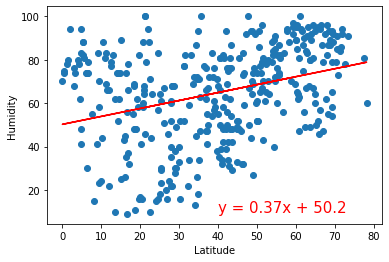

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.006912804183564774 


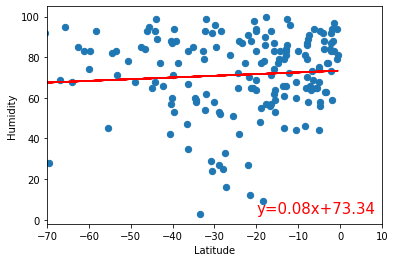

In [196]:
y_values=Sothern_hemispehere["Humidity"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-70,10)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-20,3),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()

The r-squared is: 0.0008996079328825663


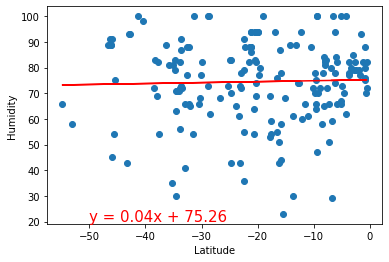

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0003776344509325565 


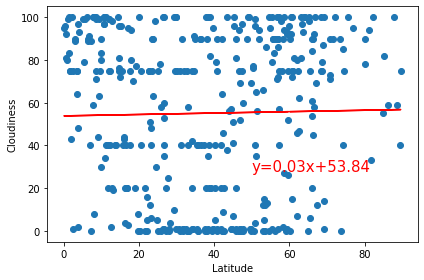

In [197]:
y_values=Nothern_hemisphere["Cloudiness"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,28),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

The r-squared is: 0.05768812657005063


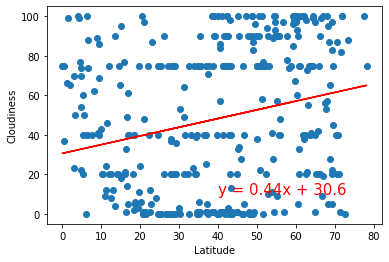

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 1.7742670760911006e-07 


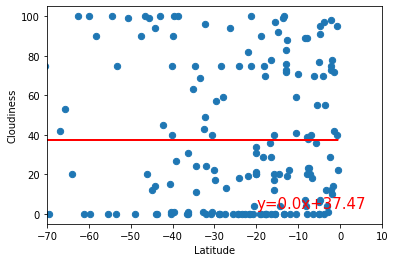

In [199]:
y_values=Sothern_hemispehere["Cloudiness"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-70,10)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-20,3),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()

The r-squared is: 0.0684912094859049


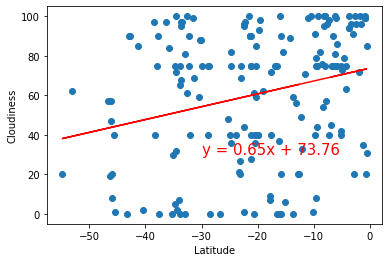

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.018590096330074617 


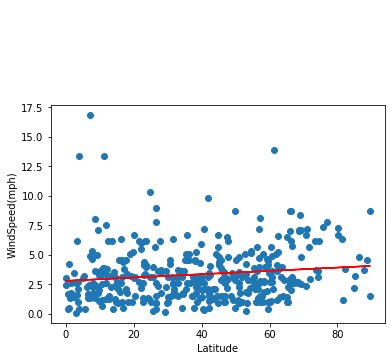

In [200]:
y_values=Nothern_hemisphere["WindSpeed"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,25),fontsize=15,color="red")

print(f"The r-squared is : {rvalue**2} ")
plt.show()

The r-squared is: 0.023371104533850804


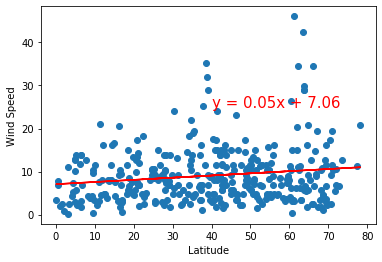

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.02253526985267685 


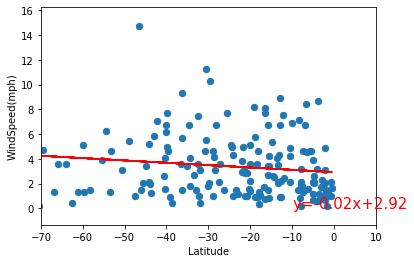

In [201]:
y_values=Sothern_hemispehere["WindSpeed"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.xlim(-70,10)
plt.ylim(min(y_values)-1.5,max(y_values)+1.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-10,0),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()

The r-squared is: 0.03381889207758188


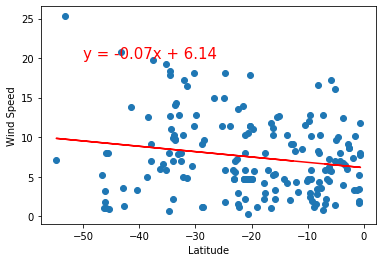